In [38]:
import sqlite3  # For SQLite database operations
import pandas as pd  # For data analysis and manipulation
import matplotlib.pyplot as plt  # For visualization

In [39]:
# Connect to SQLite database (creates the file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [40]:
cursor.execute("DROP TABLE IF EXISTS sales")
# Create a table named 'sales'
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    category TEXT,
    region TEXT,
    quantity INTEGER,
    price REAL,
    date_sold DATE
)
""")

In [41]:
# Sample sales data
sales_data = [
    ('Product A', 'Category 1', 'Region X', 10, 100.5, '2025-04-01'),
    ('Product B', 'Category 1', 'Region Y', 5, 150.75, '2025-04-02'),
    ('Product C', 'Category 2', 'Region X', 8, 90.2, '2025-04-03'),
    ('Product D', 'Category 2', 'Region Y', 15, 120.0, '2025-04-01'),
    ('Product E', 'Category 3', 'Region X', 20, 75.0, '2025-04-02'),
    ('Product F', 'Category 3', 'Region Z', 12, 200.0, '2025-04-03'),
    ('Product G', 'Category 1', 'Region Z', 18, 180.0, '2025-04-01'),
    ('Product H', 'Category 2', 'Region Y', 25, 50.0, '2025-04-04'),
    ('Product I', 'Category 3', 'Region X', 30, 80.0, '2025-04-05'),
    ('Product J', 'Category 1', 'Region Z', 22, 90.0, '2025-04-05'),
    ('Product K', 'Category 2', 'Region Y', 18, 110.0, '2025-04-06'),
    ('Product L', 'Category 3', 'Region X', 28, 105.5, '2025-04-07'),
    ('Product M', 'Category 1', 'Region Z', 32, 150.0, '2025-04-08'),
    ('Product N', 'Category 2', 'Region X', 14, 95.0, '2025-04-09'),
    ('Product O', 'Category 3', 'Region Z', 24, 120.0, '2025-04-10')
]

# Insert data into the 'sales' table
cursor.executemany("INSERT INTO sales (product, category, region, quantity, price, date_sold) VALUES (?, ?, ?, ?, ?, ?)", sales_data)
conn.commit()  # Save changes

In [43]:
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()
for row in rows:
    print(row)

('Product A', 'Category 1', 'Region X', 10, 100.5, '2025-04-01')
('Product B', 'Category 1', 'Region Y', 5, 150.75, '2025-04-02')
('Product C', 'Category 2', 'Region X', 8, 90.2, '2025-04-03')
('Product D', 'Category 2', 'Region Y', 15, 120.0, '2025-04-01')
('Product E', 'Category 3', 'Region X', 20, 75.0, '2025-04-02')
('Product F', 'Category 3', 'Region Z', 12, 200.0, '2025-04-03')
('Product G', 'Category 1', 'Region Z', 18, 180.0, '2025-04-01')
('Product H', 'Category 2', 'Region Y', 25, 50.0, '2025-04-04')
('Product I', 'Category 3', 'Region X', 30, 80.0, '2025-04-05')
('Product J', 'Category 1', 'Region Z', 22, 90.0, '2025-04-05')
('Product K', 'Category 2', 'Region Y', 18, 110.0, '2025-04-06')
('Product L', 'Category 3', 'Region X', 28, 105.5, '2025-04-07')
('Product M', 'Category 1', 'Region Z', 32, 150.0, '2025-04-08')
('Product N', 'Category 2', 'Region X', 14, 95.0, '2025-04-09')
('Product O', 'Category 3', 'Region Z', 24, 120.0, '2025-04-10')


In [44]:
print("Sales Summary:")
print(df)

Sales Summary:
      product  total_qty  revenue
0   Product A         10  1005.00
1   Product B          5   753.75
2   Product C          8   721.60
3   Product D         15  1800.00
4   Product E         20  1500.00
5   Product F         12  2400.00
6   Product G         18  3240.00
7   Product H         25  1250.00
8   Product I         30  2400.00
9   Product J         22  1980.00
10  Product K         18  1980.00
11  Product L         28  2954.00
12  Product M         32  4800.00
13  Product N         14  1330.00
14  Product O         24  2880.00


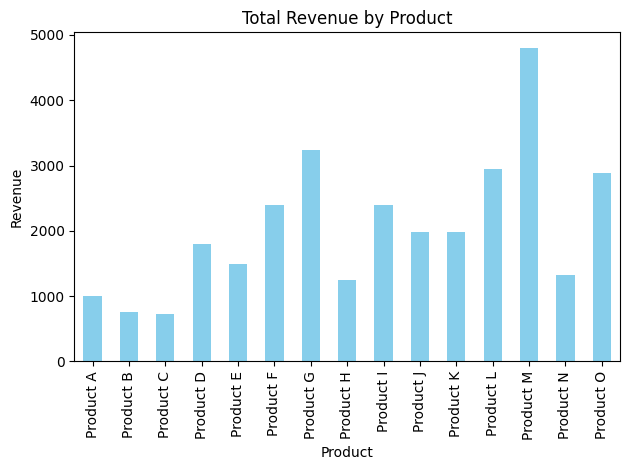

In [45]:
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart as an image
plt.show()

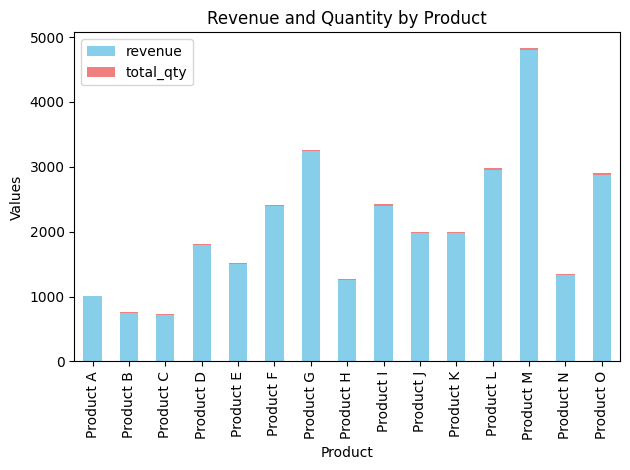

In [46]:
df.plot(kind='bar', x='product', y=['revenue', 'total_qty'], stacked=True, color=['skyblue', 'lightcoral'])
plt.title("Revenue and Quantity by Product")
plt.xlabel("Product")
plt.ylabel("Values")
plt.tight_layout()
plt.show()

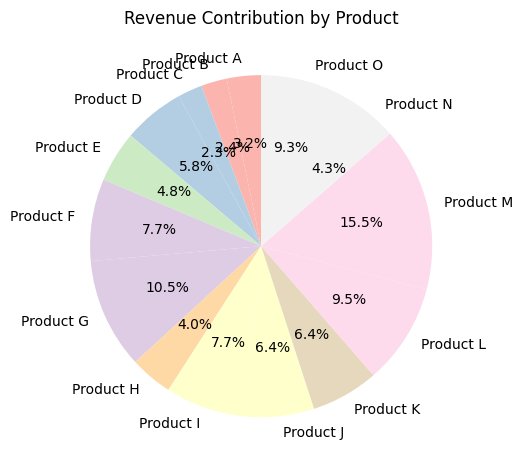

In [48]:
df.set_index('product')['revenue'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='Pastel1')
plt.title("Revenue Contribution by Product")
plt.ylabel("")  # Remove the y-axis label
plt.tight_layout()
plt.show()

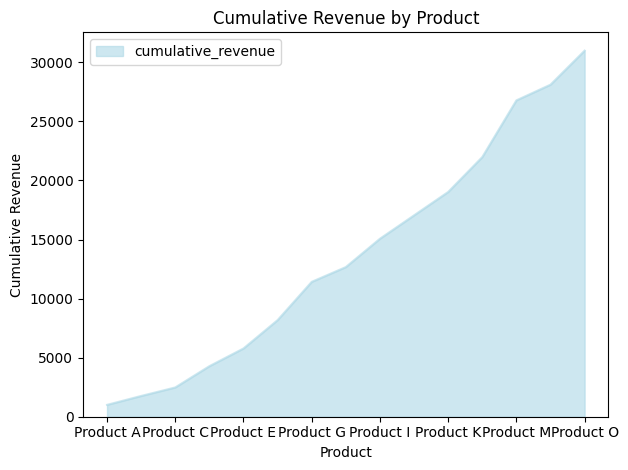

In [49]:
df.sort_values(by='product', inplace=True)
df['cumulative_revenue'] = df['revenue'].cumsum()
df.plot(kind='area', x='product', y='cumulative_revenue', color='lightblue', alpha=0.6)
plt.title("Cumulative Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Cumulative Revenue")
plt.tight_layout()
plt.show()